## Part 1: Import Statements

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from collections import Counter


from sklearn.svm import LinearSVC



from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Part 2: Import processed data

In [33]:
data = pd.read_csv("Data/processed_data.csv", index_col=0)
data = data.dropna()
data


,tweet,class
0,woman shouldnt complain cleaning house man alw...,2
1,boy dats coldtyga dwn bad cuffin dat hoe place,1
2,dawg ever fuck bitch stato cry confused shit,1
3,look like tranny,1
4,shit hear might true might faker bitch told ya,1
...,...,...
25291,yous muthafin lie right tl trash mine bible sc...,1
25292,youve gone broke wrong heababy drove redneck c...,2
25294,young buck wan na eat dat nigguh like aint fuc...,1
25295,youu got wild bitches tellin lies,1


## Part 3: Splitting data 

Splitting data 

In [34]:

#splitting the data into train, test data 0.8, 0.2
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['class'],  test_size=0.2, random_state=424)

In [35]:
X_train.sample(5)

283      damn near got ta protect tweets stalkers annoy...
23376    boycott racist redskins redskins changethename...
11500                 im made man yall pussy niggas middle
5863       cause everyone loves yo bitch ass rite yea sure
11376    wish tinder would quit showing broads retarded...
Name: tweet, dtype: object

## Oversampler

In [36]:
oversample = RandomOverSampler(sampling_strategy='all')

## Part 4: Feature Extraction

## Count Vectorization

Word n grams: unigrams

In [44]:
#Count Vectorizing the X_train
count_vec = CountVectorizer()
count_vec.fit(X_train)

X_train_count = count_vec.transform(X_train)
X_train_count = X_train_count.toarray()

#Count Vectorizing the X_test
X_test_count = count_vec.transform(X_test)
X_test_count = X_test_count.toarray()

count_vec.vocabulary_

{'august': 864,
 'alsina': 382,
 'deserved': 4249,
 'niggah': 11141,
 'grand': 6822,
 'opening': 11610,
 'top': 16909,
 'class': 3013,
 'oriental': 11661,
 'massage': 10081,
 'perfect': 12087,
 'hate': 7212,
 'bitches': 1559,
 'say': 14069,
 'aint': 266,
 'cute': 3863,
 'lol': 9653,
 'trynna': 17186,
 'hits': 7536,
 'blunt': 1741,
 'guy': 7018,
 'talk': 16264,
 'girls': 6601,
 'hoe': 7562,
 'hoes': 7581,
 'whats': 18201,
 'going': 6697,
 'pussies': 12914,
 'im': 8044,
 'asking': 754,
 'boy': 1928,
 'questions': 12996,
 'like': 9463,
 'bitch': 1545,
 'wan': 17956,
 'na': 10866,
 'nigga': 11134,
 'trinna': 17122,
 'savings': 14060,
 'account': 63,
 'omg': 11544,
 'imma': 8060,
 'funny': 6320,
 'ass': 764,
 'man': 9959,
 'thats': 16521,
 'real': 13201,
 'shit': 14553,
 'ignorant': 8004,
 'cement': 2626,
 'headed': 7271,
 'hillbilly': 7494,
 'said': 13960,
 'taxing': 16347,
 'cant': 2453,
 'fuckin': 6252,
 'read': 13193,
 'fucking': 6253,
 'knob': 9009,
 'gobbling': 6672,
 'douchebag': 468

Vocabulary of train and test set with respective counts

In [49]:
vocabulary_train = pd.DataFrame({"word":list(count_vec.vocabulary_.keys()), "Count": X_train_count.sum(axis=0)}).sort_values("Count", ascending = False)
vocabulary_test

,word,Count
1545,ooooostopflexingforigandtwitter,6291
1559,ones,2443
9463,wettest,2159
7581,sized,1818
8044,cabinet,1635
...,...,...
9521,racks,1
2082,coping,1
9523,sahara,1
9524,deseass,1


In [50]:
vocabulary_test = pd.DataFrame({"word":list(count_vec.vocabulary_.keys()), "Count": X_test_count.sum(axis=0)}).sort_values("Count", ascending = False)
vocabulary_test

,word,Count
1545,ooooostopflexingforigandtwitter,1612
9463,wettest,570
1559,ones,556
7581,sized,431
12917,donald,426
...,...,...
7435,followmebeau,0
7436,sammich,0
7437,scott,0
7439,changing,0


TFIDF Vectorization

In [38]:
#TFIDF Vectorizing the X_train

tfidf = TfidfVectorizer()

X_train_tf = tfidf.fit_transform(X_train)
X_train_tf = X_train_tf.toarray()

#TFIDF Vectorizing the X_test
X_test_tf = tfidf.transform(X_test)
X_test_tf = X_test_tf.toarray()


Balancing training data

In [39]:

def oversample(X_train_vectorized, y_train):
    print("Before Oversampling: {}".format(Counter(y_train)))

    # # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='all')

    # # fit and apply the transform
    X_train_over, y_train_over = oversample.fit_resample(X_train_vectorized, y_train)
    print("After Oversampling: {}".format(Counter(y_train_over)))
    
    return X_train_over, y_train_over

## Oversampling

Oversampling CountVectorized training data

In [40]:
X_train_over_count, y_train_over_count = oversample(X_train_count, y_train)

Before Oversampling:Counter({1: 14738, 2: 3234, 0: 1120})


After Oversampling:Counter({1: 14738, 2: 14738, 0: 14738})


Oversampling TFIDF-Vectorized  training data

In [51]:
X_train_over_tf, y_train_over_tf = oversample(X_train_tf, y_train)

Before Oversampling:Counter({1: 14738, 2: 3234, 0: 1120})
After Oversampling:Counter({1: 14738, 2: 14738, 0: 14738})


## Models

In [52]:
def printModelStats(y_preds, y_test):
    print(classification_report(y_test, y_preds, target_names = ['Hate', 'Offensive', 'Neither']))
    
    cm = confusion_matrix(y_preds, y_test)
    print("The confustion matrix:")
    print(cm)
    sns.heatmap(cm/np.sum(cm), annot = True, fmt='.2%', cmap = "Blues").set(title ="Confusion Matrix Expressed in %")

Linear SVC and data with CountVectorizations

c:\miniconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

        Hate       0.23      0.39      0.29       249
   Offensive       0.94      0.89      0.91      3709
     Neither       0.82      0.83      0.83       815

    accuracy                           0.85      4773
   macro avg       0.66      0.70      0.68      4773
weighted avg       0.88      0.85      0.86      4773

The confustion matrix:
[[  98  297   29]
 [ 120 3293  108]
 [  31  119  678]]


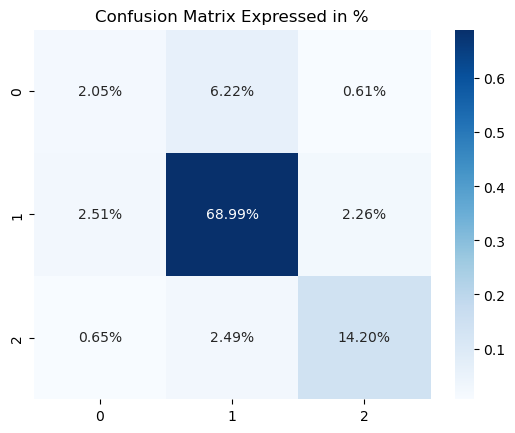

In [53]:
# Initalising model
svc = LinearSVC()

# Train and predict
svc.fit(X_train_over_count, y_train_over_count)
y_preds = svc.predict(X_test_count)

# output statistics
printModelStats(y_preds, y_test)

Linear SVC and data with TFIDF Vectorizations

              precision    recall  f1-score   support

        Hate       0.25      0.44      0.32       249
   Offensive       0.94      0.88      0.91      3709
     Neither       0.80      0.85      0.82       815

    accuracy                           0.85      4773
   macro avg       0.66      0.72      0.68      4773
weighted avg       0.88      0.85      0.86      4773

The confustion matrix:
[[ 109  307   22]
 [ 110 3256  101]
 [  30  146  692]]


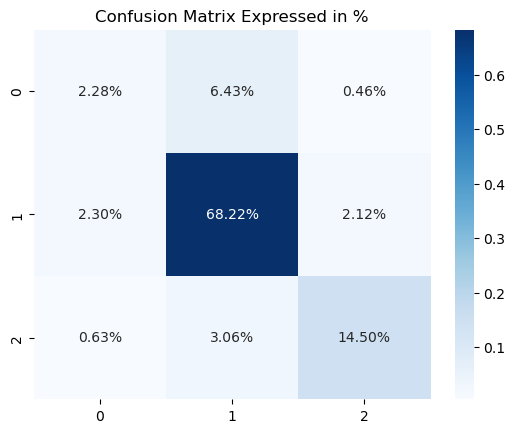

In [54]:
# Initalising model
svc = LinearSVC()

# Train and predict
svc.fit(X_train_over_tf, y_train_over_tf)
y_preds = svc.predict(X_test_tf)

# output statistics
printModelStats(y_preds, y_test)

In [ ]:
print(classification_report(y_test, y_preds, target_names = ['Hate', 'Offensive', 'Neither']))